In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
path = './dataset/raw.csv'

df = pd.read_csv(path, nrows=50000)
df.columns = df.columns.str.lower()

In [3]:
df.head()

,diabetes,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
mean = df.isna().mean() * 100
mean

diabetes                0.0
highbp                  0.0
highchol                0.0
cholcheck               0.0
bmi                     0.0
smoker                  0.0
stroke                  0.0
heartdiseaseorattack    0.0
physactivity            0.0
fruits                  0.0
veggies                 0.0
hvyalcoholconsump       0.0
anyhealthcare           0.0
nodocbccost             0.0
genhlth                 0.0
menthlth                0.0
physhlth                0.0
diffwalk                0.0
sex                     0.0
age                     0.0
education               0.0
income                  0.0
dtype: float64

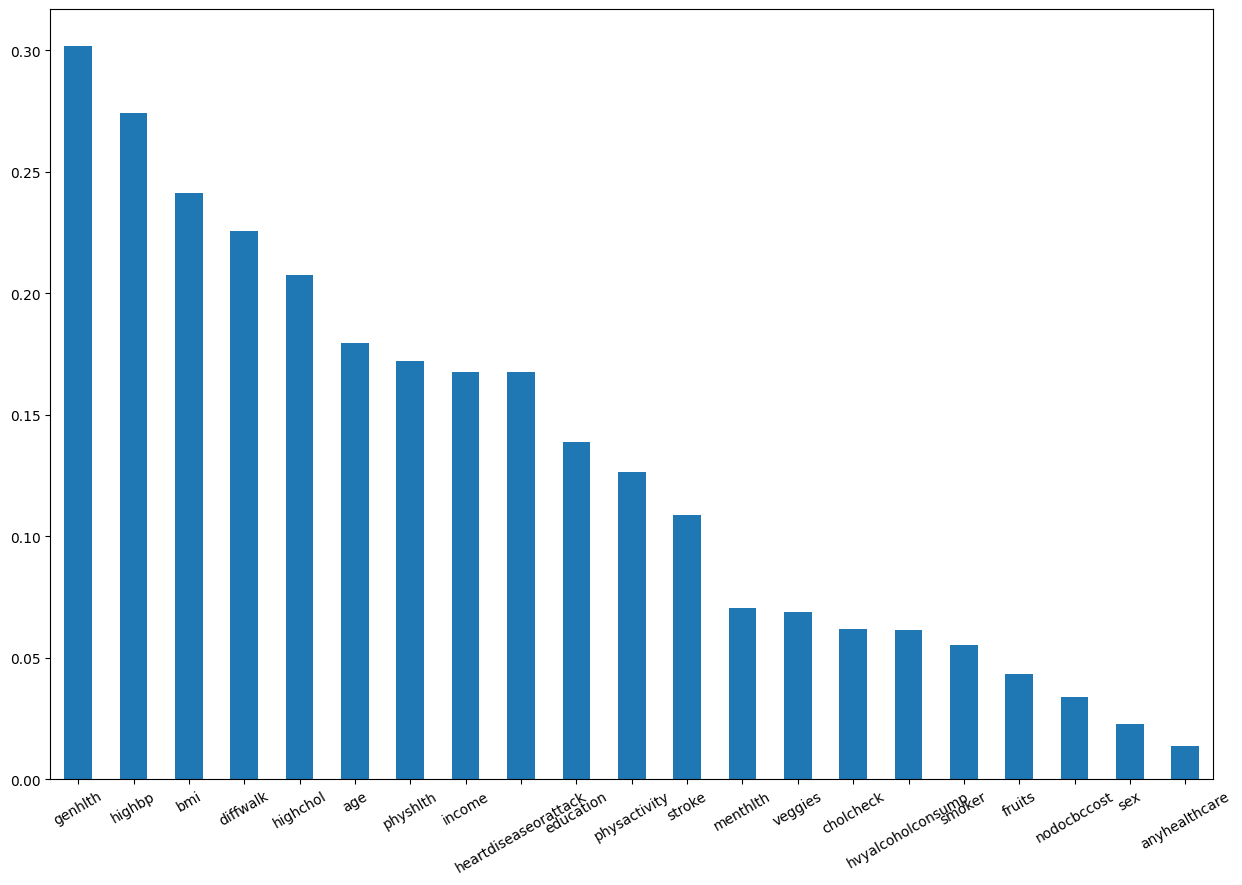

In [5]:
plt.figure(figsize=(15,10))
df.corr()['diabetes'].abs().sort_values(ascending=False).drop('diabetes').plot(kind='bar')
plt.xticks(rotation = 30)
plt.show()

In [6]:
df = df.drop(columns=["menthlth", 'cholcheck', 'smoker', 'veggies', 'hvyalcoholconsump', 'nodocbccost', 'sex', 'anyhealthcare', 'fruits'])

In [7]:
df.head()

,diabetes,highbp,highchol,bmi,stroke,heartdiseaseorattack,physactivity,genhlth,physhlth,diffwalk,age,education,income
0,0.0,1.0,1.0,40.0,0.0,0.0,0.0,5.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,5.0,30.0,1.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,5.0,4.0


In [8]:
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

In [9]:
X

,highbp,highchol,bmi,stroke,heartdiseaseorattack,physactivity,genhlth,physhlth,diffwalk,age,education,income
0,1.0,1.0,40.0,0.0,0.0,0.0,5.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,25.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,28.0,0.0,0.0,0.0,5.0,30.0,1.0,9.0,4.0,8.0
3,1.0,0.0,27.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,24.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.0,0.0,33.0,0.0,0.0,1.0,3.0,1.0,0.0,8.0,6.0,8.0
49996,0.0,0.0,20.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,6.0,6.0
49997,1.0,1.0,29.0,0.0,0.0,1.0,2.0,0.0,0.0,6.0,5.0,8.0
49998,0.0,0.0,22.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,6.0,7.0


In [10]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49995    0.0
49996    0.0
49997    0.0
49998    0.0
49999    0.0
Name: diabetes, Length: 50000, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)

In [15]:
accuracy

0.8356

In [16]:
test_data = [[1.0, 1.0, 40.0, 0.0, 0.0, 0.0, 5.0, 15.0, 1.0, 9.0, 4.0, 3.0]]

x_test_data = pd.DataFrame(data=test_data, columns=X.columns)

x_test_data = scaler.transform(x_test_data)

y_pred = svm_model.predict(x_test_data)

y_pred

array([0.])